In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import csv
import pandas_datareader as pdr
from datetime import datetime
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [ ]:
df=pd.read_csv('/content/sample_data/sheet.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,Upper Bollinger band,Lower Bollinger band,...,EMA 12,EMA 26,Volume Weighted Average Price,William % R,Commodity Channel Index,Rate of Change (10 days),Aroon Up,Aroon Down,MACD,BUY/SELL
0,2010/02/09,492.209351,494.314392,486.736237,491.961700,445.888885,6595770,77.363565,538.556974,482.723033,...,507.070528,526.112973,525.687818,-82.107805,-133.346702,-0.04683073594,32,88,-19.042446,0
1,2010/02/10,495.255463,495.255463,486.389526,487.924957,442.230225,8427562,77.450994,534.379680,480.362298,...,504.125055,523.284232,524.857180,-89.479146,-126.800124,-0.04131185583,28,84,-19.159176,-1
2,2010/02/11,489.980469,505.112030,489.609009,502.808868,455.720215,10822218,73.800489,529.706166,482.283331,...,503.922565,521.767538,524.114793,-50.645372,-81.142246,-0.02121195237,24,80,-17.844973,1
3,2010/02/15,508.678253,508.678253,499.069336,500.258057,453.408264,6229609,62.190715,526.939071,481.947695,...,503.358794,520.174243,523.763755,-56.976014,-62.805145,-0.03460143653,20,76,-16.815449,-1
4,2010/02/16,500.307587,505.706421,497.781525,504.096680,456.887390,4646498,59.535849,524.309725,482.857629,...,503.472315,518.983313,523.507625,-47.449261,-61.770626,-0.02644921791,16,72,-15.510997,1


In [ ]:
df.tail()

In [ ]:
df.shape

In [ ]:
dff=df.set_index('Date')

In [ ]:
dff

,Open,High,Low,Close,Adj Close,Volume,RSI,Upper Bollinger band,Lower Bollinger band,%K (5 days stochastic oscillator),...,EMA 12,EMA 26,Volume Weighted Average Price,William % R,Commodity Channel Index,Rate of Change (10 days),Aroon Up,Aroon Down,MACD,BUY/SELL
Date,,,,,,,,,,,,,,,,,,,,,
2010/02/09,492.209351,494.314392,486.736237,491.961700,445.888885,6595770,77.363565,538.556974,482.723033,24.863803,...,507.070528,526.112973,525.687818,-82.107805,-133.346702,-0.04683073594,32,88,-19.042446,0
2010/02/10,495.255463,495.255463,486.389526,487.924957,442.230225,8427562,77.450994,534.379680,480.362298,16.031785,...,504.125055,523.284232,524.857180,-89.479146,-126.800124,-0.04131185583,28,84,-19.159176,-1
2010/02/11,489.980469,505.112030,489.609009,502.808868,455.720215,10822218,73.800489,529.706166,482.283331,89.620565,...,503.922565,521.767538,524.114793,-50.645372,-81.142246,-0.02121195237,24,80,-17.844973,1
2010/02/15,508.678253,508.678253,499.069336,500.258057,453.408264,6229609,62.190715,526.939071,481.947695,67.307688,...,503.358794,520.174243,523.763755,-56.976014,-62.805145,-0.03460143653,20,76,-16.815449,-1
2010/02/16,500.307587,505.706421,497.781525,504.096680,456.887390,4646498,59.535849,524.309725,482.857629,79.444438,...,503.472315,518.983313,523.507625,-47.449261,-61.770626,-0.02644921791,16,72,-15.510997,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022/09/05,2531.000000,2581.500000,2531.000000,2569.800049,2569.800049,5227785,58.195854,2691.671064,2541.343236,34.106791,...,2592.431907,2579.893536,1019.179252,-70.833259,-92.978210,-0.01685255365,48,0,12.538371,1
2022/09/06,2573.000000,2606.000000,2572.000000,2596.850098,2596.850098,5030172,58.608005,2687.970925,2537.264810,59.514946,...,2593.111629,2581.149578,1019.470203,-50.692916,-29.493616,-0.003740504732,44,0,11.962051,1
2022/09/07,2575.000000,2594.899902,2570.000000,2581.750000,2581.750000,3455942,58.895007,2681.110820,2532.210643,69.800766,...,2591.363686,2581.194053,1019.668841,-61.157290,-53.368680,-0.02457686557,40,0,10.169633,0


In [ ]:
type(dff)

pandas.core.frame.DataFrame

In [ ]:
dff.columns 

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI',
       'Upper Bollinger band', 'Lower Bollinger band',
       '%K (5 days stochastic oscillator)', '%D Average(H,3)', 'EMA 12',
       'EMA 26', 'Volume Weighted Average Price', 'William % R',
       'Commodity Channel Index', 'Rate of Change (10 days)', 'Aroon Up',
       'Aroon Down', 'MACD', 'BUY/SELL'],
      dtype='object')

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3113 entries, 2010/02/09 to 2022/09/09
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Open                               3113 non-null   float64
 1   High                               3113 non-null   float64
 2   Low                                3113 non-null   float64
 3   Close                              3113 non-null   float64
 4   Adj Close                          3113 non-null   float64
 5   Volume                             3113 non-null   int64  
 6   RSI                                3113 non-null   float64
 7   Upper Bollinger band               3113 non-null   float64
 8   Lower Bollinger band               3113 non-null   float64
 9   %K (5 days stochastic oscillator)  3113 non-null   float64
 10  %D Average(H,3)                    3113 non-null   float64
 11  EMA 12                             3113 non-nu

In [ ]:
dff.isnull().sum()

Open                                 0
High                                 0
Low                                  0
Close                                0
Adj Close                            0
Volume                               0
RSI                                  0
Upper Bollinger band                 0
Lower Bollinger band                 0
%K (5 days stochastic oscillator)    0
%D Average(H,3)                      0
EMA 12                               0
EMA 26                               0
Volume Weighted Average Price        0
William % R                          0
Commodity Channel Index              0
Rate of Change (10 days)             0
Aroon Up                             0
Aroon Down                           0
MACD                                 0
BUY/SELL                             0
dtype: int64

In [ ]:
dff.describe()

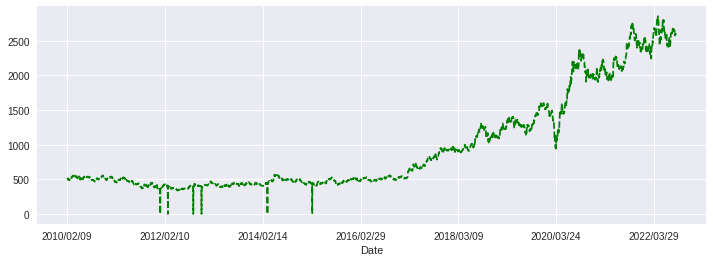

In [ ]:
dff['High'].plot(figsize=(12,4),ls='--',c='green')

In [ ]:
dff.index

Index(['2010/02/09', '2010/02/10', '2010/02/11', '2010/02/15', '2010/02/16',
       '2010/02/17', '2010/02/18', '2010/02/19', '2010/02/22', '2010/02/23',
       ...
       '2022/08/26', '2022/08/29', '2022/08/30', '2022/09/01', '2022/09/02',
       '2022/09/05', '2022/09/06', '2022/09/07', '2022/09/08', '2022/09/09'],
      dtype='object', name='Date', length=3113)

In [ ]:
index=dff.loc['19/08/2022':'09/09/2022'].index
share_open=dff.loc['19/08/2022':'09/09/2022']['Open']

In [ ]:
share_open

Series([], Name: Open, dtype: float64)

In [ ]:
index

Index([], dtype='object', name='Date')

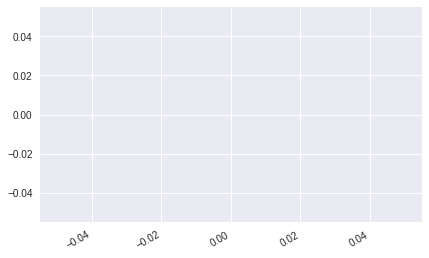

In [ ]:
figure,axis=plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index,share_open)

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,Upper Bollinger band,Lower Bollinger band,...,EMA 12,EMA 26,Volume Weighted Average Price,William % R,Commodity Channel Index,Rate of Change (10 days),Aroon Up,Aroon Down,MACD,BUY/SELL
0,2010/02/09,492.209351,494.314392,486.736237,491.961700,445.888885,6595770,77.363565,538.556974,482.723033,...,507.070528,526.112973,525.687818,-82.107805,-133.346702,-0.04683073594,32,88,-19.042446,0
1,2010/02/10,495.255463,495.255463,486.389526,487.924957,442.230225,8427562,77.450994,534.379680,480.362298,...,504.125055,523.284232,524.857180,-89.479146,-126.800124,-0.04131185583,28,84,-19.159176,-1
2,2010/02/11,489.980469,505.112030,489.609009,502.808868,455.720215,10822218,73.800489,529.706166,482.283331,...,503.922565,521.767538,524.114793,-50.645372,-81.142246,-0.02121195237,24,80,-17.844973,1
3,2010/02/15,508.678253,508.678253,499.069336,500.258057,453.408264,6229609,62.190715,526.939071,481.947695,...,503.358794,520.174243,523.763755,-56.976014,-62.805145,-0.03460143653,20,76,-16.815449,-1
4,2010/02/16,500.307587,505.706421,497.781525,504.096680,456.887390,4646498,59.535849,524.309725,482.857629,...,503.472315,518.983313,523.507625,-47.449261,-61.770626,-0.02644921791,16,72,-15.510997,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3108,2022/09/05,2531.000000,2581.500000,2531.000000,2569.800049,2569.800049,5227785,58.195854,2691.671064,2541.343236,...,2592.431907,2579.893536,1019.179252,-70.833259,-92.978210,-0.01685255365,48,0,12.538371,1
3109,2022/09/06,2573.000000,2606.000000,2572.000000,2596.850098,2596.850098,5030172,58.608005,2687.970925,2537.264810,...,2593.111629,2581.149578,1019.470203,-50.692916,-29.493616,-0.003740504732,44,0,11.962051,1
3110,2022/09/07,2575.000000,2594.899902,2570.000000,2581.750000,2581.750000,3455942,58.895007,2681.110820,2532.210643,...,2591.363686,2581.194053,1019.668841,-61.157290,-53.368680,-0.02457686557,40,0,10.169633,0
3111,2022/09/08,2588.250000,2598.000000,2571.000000,2585.399902,2585.399902,3256840,60.656396,2670.549281,2531.929304,...,2590.446181,2581.505598,1019.856298,-58.627907,-54.556808,-0.02058910806,36,80,8.940583,0


In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.info()

In [ ]:
df=df.set_index('Date',drop=True)

In [ ]:
df

In [ ]:
datetime(2022,9,5)

In [ ]:
datetime.now()

In [ ]:
##year and frequency
df.resample(rule='A').min()

In [ ]:
df.resample(rule='A').max()

In [ ]:
df.resample(rule='A').max()['Open'].plot()

In [ ]:
##Quaterly start frequency
df.resample(rule='QS').max()

In [ ]:
df.resample(rule='QS').max()['High'].plot()

In [ ]:
##business and frequency (BUSINESS YEAR END)
df.resample(rule='BA').max()

In [ ]:
##business quarters
df.resample(rule='BQS').max()

In [ ]:
df['Open'].resample(rule='BA').mean().plot(kind='bar')

In [ ]:
df['Open'].resample(rule='M').mean() ##monthly

In [ ]:
plt.tight_layout()
df['Open'].resample(rule='M').max().plot(kind='bar',figsize=(35,6))

In [ ]:
df['High'].rolling(10).mean().head(20)

In [ ]:
df['Open:10days rolling']=df['Open'].rolling(30).mean()
df['Open:30days rolling']=df['Open'].rolling(40).mean()
df['Open:50days rolling']=df['Open'].rolling(50).mean()

In [ ]:
df[['Open','Open:10days rolling']].plot(xlim=['2017-01-20','2022-01-22' ],figsize=(15,6))

In [ ]:
df[['Open','Open:10days rolling','Open:30days rolling','Open:50days rolling']].plot(xlim=['2017-01-20','2022-01-22' ],figsize=(15,6))

In [ ]:
##expanding  CMA cumulative moving average of the open stock wrt different years
df['Open'].expanding().mean().plot(figsize=(10,5))

In [ ]:
##EWMA- Exponential Weighted Moving average, SMOOTHING FACTOR - 0.1
df['EMA_5days']=df['Open'].ewm(span=5).mean()

In [ ]:
df[['Open','EMA_5days']].plot(figsize=(15,5))

# Random Forest

In [112]:
data=pd.read_csv('sheet.csv')

In [95]:
#Setting features and target variables
X = data.drop("BUY/SELL", axis=1)
X = X.drop("Date",axis=1)
y = data["BUY/SELL"]

In [96]:
data.dropna(inplace=True)

train_size = int(0.85 * y.shape[0])
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

In [6]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [7]:
rfc_predict

array([-1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1,  0, -1, -1, -1, -1,  1, -1, -1,  1,  1,  0, -1,
       -1, -1, -1,  0, -1,  0,  0,  0,  1,  1,  0,  0, -1, -1,  1, -1, -1,
       -1,  1, -1,  1,  0,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  0,  1,  0,  0,  1,  1, -1,  1,  1, -1,  0, -1, -1,  0,
        1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  0,
        1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  1,  0, -1,
       -1,  0,  0,  1,  1,  1,  1, -1, -1, -1, -1,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  1, -1, -1,  0, -1,  1,  1,  1,  1, -1, -1,  1, -1,
       -1,  0,  0,  1,  0, -1, -1, -1,  0,  0,  0, -1, -1, -1, -1,  0,  0,
        1,  1, -1,  0, -1, -1,  0,  1,  0,  0,  0, -1, -1,  1, -1, -1, -1,
       -1,  1, -1,  0,  1,  0,  0, -1, -1,  0,  0,  1,  1,  0, -1, -1, -1,
       -1,  0,  0,  1,  0,  1, -1, -1,  0,  1,  0,  0,  0, -1, -1, -1, -1,
        1, -1,  0,  0,  0

In [8]:
#Result Summary

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Confusion Matrix ===
[[131  40   3]
 [ 54  58  25]
 [ 15  61  79]]


=== Classification Report ===
              precision    recall  f1-score   support

          -1       0.66      0.75      0.70       174
           0       0.36      0.42      0.39       137
           1       0.74      0.51      0.60       155

    accuracy                           0.58       466
   macro avg       0.59      0.56      0.57       466
weighted avg       0.60      0.58      0.58       466





In [9]:
rfc_predict
print('Final Accuracy: %.3f' % accuracy_score(y_test,rfc_predict))

Final Accuracy: 0.575


In [ ]:
# Model for prediction from Financial Indicators (Not including 'Open','High','Low','Close','Adj Close','Volume')

In [10]:
X = data.drop(["Date","BUY/SELL","Open","High","Low","Close","Adj Close","Close","Volume"], axis=1)
y = data["BUY/SELL"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [12]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)


In [13]:
rfc_predict
print('Final Accuracy: %.3f' % accuracy_score(y_test,rfc_predict))

Final Accuracy: 0.599


In [14]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Confusion Matrix ===
[[140  30   4]
 [ 54  49  34]
 [ 15  50  90]]


=== Classification Report ===
              precision    recall  f1-score   support

          -1       0.67      0.80      0.73       174
           0       0.38      0.36      0.37       137
           1       0.70      0.58      0.64       155

    accuracy                           0.60       466
   macro avg       0.58      0.58      0.58       466
weighted avg       0.60      0.60      0.59       466





In [ ]:
#Tuning Hyper Parameters

In [15]:

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 380}


In [16]:
rfc = RandomForestClassifier(n_estimators=600, max_depth=300, max_features='sqrt')
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
rfc_predict


=== Confusion Matrix ===
[[139  30   5]
 [ 56  51  30]
 [ 17  35 103]]


=== Classification Report ===
              precision    recall  f1-score   support

          -1       0.66      0.80      0.72       174
           0       0.44      0.37      0.40       137
           1       0.75      0.66      0.70       155

    accuracy                           0.63       466
   macro avg       0.61      0.61      0.61       466
weighted avg       0.62      0.63      0.62       466





array([-1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1,  0, -1, -1, -1, -1,  0, -1, -1,  0,  1,  0, -1,
       -1, -1, -1,  0,  1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1,
       -1,  1, -1,  1,  0,  0, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,
        1,  0,  0, -1,  1, -1,  0,  1,  1, -1,  1,  1, -1,  0, -1, -1, -1,
        1, -1,  0, -1,  1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1,  1,  0,
        1, -1, -1, -1,  1, -1,  0, -1,  0,  0,  0, -1, -1, -1,  1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  0,  1,  0,  0, -1,  0,
        1,  0,  0, -1,  1, -1, -1,  0,  1,  1,  1,  1,  1, -1, -1,  0,  0,
       -1,  0,  1,  1,  0, -1,  0,  0, -1, -1,  0, -1, -1, -1, -1,  0,  0,
        1,  1, -1, -1, -1, -1,  0,  1,  0,  0,  1, -1, -1,  1, -1, -1, -1,
       -1,  1, -1,  1,  1,  1,  0, -1, -1, -1,  1,  1,  1,  0, -1, -1, -1,
        0,  1,  0,  1,  0,  1, -1,  0,  0,  1,  0,  0,  0, -1, -1, -1, -1,
        1,  0,  0,  0,  1

In [17]:
print('Final Accuracy: %.3f' % accuracy_score(y_test,rfc_predict))

Final Accuracy: 0.629


In [ ]:
# Feature Importance

In [18]:
rfc.feature_importances_

array([0.06084188, 0.0450641 , 0.04541266, 0.20891144, 0.10355189,
       0.04327895, 0.04375669, 0.04982767, 0.1235045 , 0.06376609,
       0.06651124, 0.04571163, 0.04319326, 0.056668  ])

<BarContainer object of 14 artists>

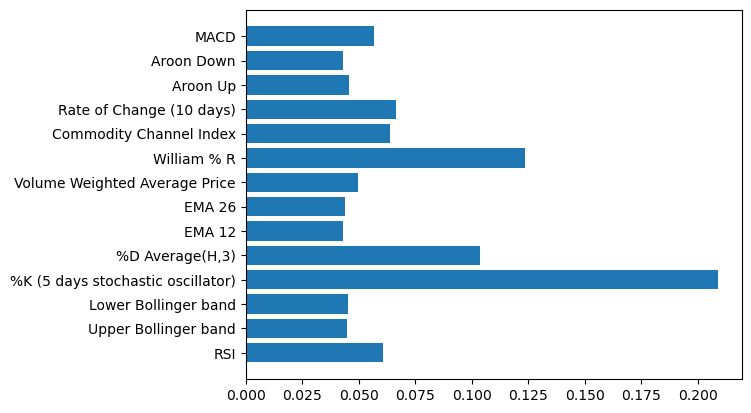

In [19]:
plt.barh(X.columns, rfc.feature_importances_)

In [ ]:
# Sorting the graph

Text(0.5, 0, 'Random Forest Feature Importance')

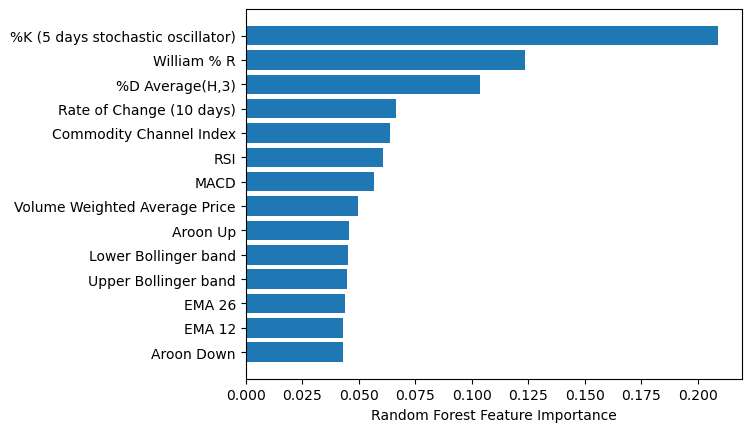

In [20]:
sorted_idx = rfc.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rfc.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# Naive Bayes Model

In [21]:
clf=GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.37      1.00      0.54       174
           0       0.00      0.00      0.00       137
           1       0.00      0.00      0.00       155

    accuracy                           0.37       466
   macro avg       0.12      0.33      0.18       466
weighted avg       0.14      0.37      0.20       466



In [25]:
y_pred
print('Final Accuracy: %.3f' % accuracy_score(y_test,y_pred))

Final Accuracy: 0.373


# BernoulliNB()

In [26]:
BernNB=BernoulliNB(binarize = 0.1)
BernNB.fit(X_train,y_train)
print(BernNB)

y_pred2=BernNB.predict(X_test)
print(accuracy_score(y_test,y_pred2))

BernoulliNB(binarize=0.1)
0.4227467811158798


In [30]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.5230
Test set score: 0.3734


In [31]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[174   0   0]
 [137   0   0]
 [155   0   0]]

True Positives(TP) =  174

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  137


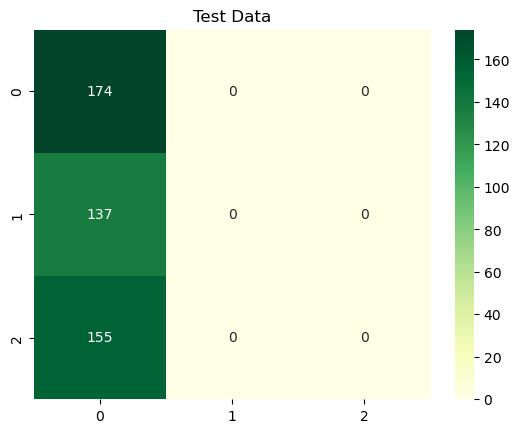

In [32]:
sns.heatmap((confusion_matrix(y_test,y_pred)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data');

# KNeighbours Classifier 

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("sheet.csv")
df["AdjClose"] = df.Close.diff()
df["SMA_2"] = df.Close.rolling(2).mean()
df["Force_Index"] = df["Close"] * df["Volume"]
df["y1"] = df["AdjClose"].apply(lambda x1: 1 if x1 > 0 else 0).shift(-1)
df = df.drop(
   ["Date","Open", "High", "Low", "Close", "Volume", "AdjClose"],
   axis=1,
).dropna()
# print(df)
X_new = df.drop(["y1"], axis=1).values
y_new = df["y1"].values
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new,y_new,test_size=0.2,shuffle=False)

In [174]:
knn = KNeighborsClassifier(n_neighbors=5, metric = 'hamming')
knn.fit(X_new_train,y_new_train)
y1_pred = knn.predict(X_new_test)
print(accuracy_score(y_new_test, y1_pred))

0.5112903225806451


In [175]:
print(classification_report(y_new_test,y1_pred))

              precision    recall  f1-score   support

         0.0       0.47      0.55      0.51       286
         1.0       0.55      0.48      0.51       334

    accuracy                           0.51       620
   macro avg       0.51      0.51      0.51       620
weighted avg       0.52      0.51      0.51       620



In [176]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_new_test, y1_pred)  
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[157 129]
 [174 160]]

True Positives(TP) =  157

True Negatives(TN) =  160

False Positives(FP) =  129

False Negatives(FN) =  174


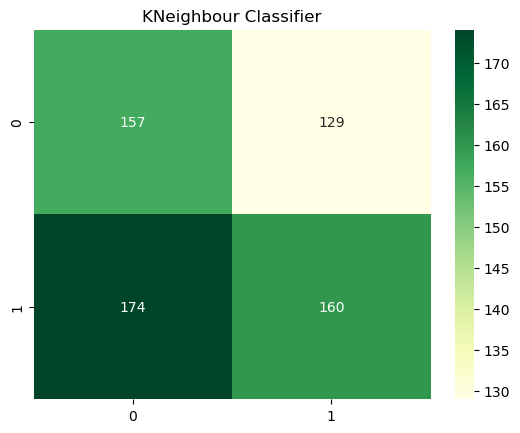

In [177]:
sns.heatmap((confusion_matrix(y_new_test,y1_pred)),annot=True,fmt='.5g',cmap="YlGn").set_title('KNeighbour Classifier');

Text(0.5, 1.0, 'Predicted values')

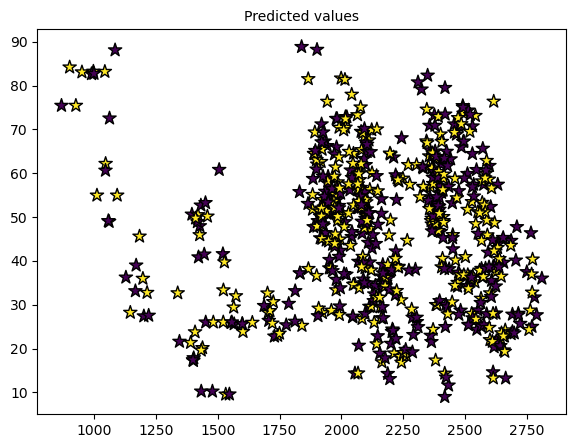

In [178]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(X_new_test[:,0], X_new_test[:,1], c=y1_pred, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values", fontsize=10)

# ARIMA (Stock Market Forecasting)
(AutoRegressive Integrated Moving Average) is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

ARIMA models explain a time series based on its own past values, basically its own lags and the lagged forecast errors.

In [1]:
from IPython.core.debugger import set_trace 

import pandas as pd
import numpy as np 
import os 
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA


from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Loading the dataset.

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y/%m/%d')
data = pd.read_csv('/content/sample_data/sheet.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)


In [ ]:
data.head()

Showing the columns in the dataset 

In [ ]:
data.info()

Visualizing the per day closing price of the stock.

In [ ]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('Reliance GROUP closing price')
plt.show()

Creating a copy of the data with just close (closing price) feature.

In [8]:
dataf= data[["Close"]].copy()

In [ ]:
dataf.describe()

Visualizing the data in our series through a probability distribution

In [ ]:
dataf.plot(kind='kde')

Also, a given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

Level: The average value in the series.

Trend: The increasing or decreasing value in the series.

Seasonality: The repeating short-term cycle in the series.

Noise: The random variation in the series.

First, we need to check if a series is stationary or not because time series analysis only works with stationary data.

ADF (Augmented Dickey-Fuller) Test

The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:

Null Hypothesis: The series has a unit root (value of a =1)

Alternate Hypothesis: The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.

If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.

**So let's check for stationarity:

In [ ]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(dataf)

Through the above graph, we can see the increasing mean and standard deviation and hence our series is not stationary.

We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.

In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

So let us separate Trend and Seasonality from the time series.

In [12]:
# check if the price series is stationary 

from statsmodels.tsa.stattools import adfuller 
result = adfuller(data.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p=value: {result[1]}")

ADF Statistic: 0.6464651620094167
p=value: 0.9887066433562735


Hence, p-value is quite high so it's clear that the price series is not stationary. beacause we all will be rich and buying low and sell high 

Autocorrelation Function (ACF)


In [14]:
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
fig, (ax1, ax2 ) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(dataf.Close)
ax1.set_title("Original")

#add : at the end of the plot function so that the plot is not duplicated
plot_acf(dataf, ax=ax2);

Left graph = original price series 
Right graph = Autocorrelation 

In [ ]:
diff = dataf.Close.diff().dropna()

fig, (ax1, ax2 ) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")

#add : at the end of the plot function so that the plot is not duplicated
plot_acf(diff, ax=ax2);


After difference it once , we are getting the returns of close price, now our returns are randomly distributed around the mean of zero 



In [ ]:
diff = dataf.Close.diff().diff().dropna()

fig, (ax1, ax2 ) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference twice")

#add : at the end of the plot function so that the plot is not duplicated
plot_acf(diff, ax=ax2);


In the second differencing, the lag goes into the far negative compared to the first order of differencing so that may indicate that the series might have been over difference so w'll choose order of diffrencing as 1

So the value of  d = 1

In [19]:
!pip install pmdarima 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 9.9 MB 40.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


P 

p is the order of the Auto Regressive (AR) term. It refers to the number of lags to be used as predictors.

We can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot 

The partial autocorrelation represents the correlation between the series and its lags.



In [20]:
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
diff = dataf.Close.diff().dropna()

fig, (ax1, ax2 ) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)

plot_pacf(diff, ax=ax2);

We can observe that the PACF lag 6 is significant as it's above the significant line.
So the value of p = 6


q

q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

We can look at the ACF plot for the number of MA terms.


In [ ]:
diff = dataf.Close.diff().dropna()

fig, (ax1, ax2 ) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)

plot_acf(diff, ax=ax2);

Here we can see that the forecast error 3 may be suitable for this model so the value of q = 3


In [ ]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(dataf.Close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()


Now we are going to create an ARIMA model and will train it with the closing price of the stock on the train data. So let us split the data into training and test set and visualize it.

TRAIN TEST SPLIT

20% = Test data and 80% training data

In [25]:
#split data into train and training set
n = int(len(dataf)* 0.8)
train = dataf.Close[ :n]
test = dataf.Close[ n: ]

In [26]:
print(len(train))
print(len(test))

2490
623


In [27]:
from statsmodels.tsa.arima_model import ARIMA 

In [28]:
# Fitting the model
model = ARIMA (train, order=(6, 1, 3))
result = model.fit(disp=0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn(
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn(


In [ ]:
result.summary()

As coefficients are not very close to zero, which means that we can keep all of them. So considering p values it shows that all of the terms are suitable for our linear regression.

In [ ]:
print(result.summary())

These are our ARIMA model results: 

1. There are total 6 AR terms and 3 MA terms 
2. In the second column, those are the coefficients for the linear regression that are a part of this and contains the p value for each of these terms.




If any of these coefficients are very close to 0, then we can remove that terms 
also the p values should be very low so that these terms are important to our regression model 


In [ ]:
# Looking at the summary, let's plot the residual errors 

residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2 ) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(residuals)
ax2.hist(residuals, density=True)



Residuals are distributed around the mean of zero


In order to see the actual results versus the fitted/predicted results, we can look at the first 30 steps and setting dynamic as false.


Now let's start forecast the stock prices on the test dataset keeping 95% confidence level.

Let's forecast 30 steps.

In [32]:
step = 30
fc, se, conf = result.forecast(step)

Let's check the forecast

In [33]:
fc

array([1293.47598425, 1295.13698902, 1298.12150066, 1300.31008089,
       1301.50672853, 1302.15663021, 1303.88881804, 1305.57161959,
       1305.88652018, 1305.4111641 , 1305.78625075, 1307.20288719,
       1308.15620063, 1307.80598144, 1307.29558867, 1307.98622289,
       1309.35373366, 1309.81156527, 1309.17806144, 1308.9580557 ,
       1310.00709765, 1311.2072365 , 1311.20632055, 1310.51648838,
       1310.71622778, 1312.00002812, 1312.87995004, 1312.49735881,
       1311.95348423, 1312.59714477])

In [35]:
conf 

array([[1241.33387562, 1345.61809289],
       [1237.69717647, 1352.57680158],
       [1235.71893823, 1360.52406309],
       [1233.49792281, 1367.12223897],
       [1230.67219016, 1372.3412669 ],
       [1227.7682167 , 1376.54504373],
       [1226.18037394, 1381.59726214],
       [1224.79578492, 1386.34745426],
       [1222.24365861, 1389.52938175],
       [1219.00735913, 1391.81496908],
       [1216.68423402, 1394.88826748],
       [1215.50093563, 1398.90483875],
       [1213.98049171, 1402.33190955],
       [1211.24284054, 1404.36912234],
       [1208.37297602, 1406.21820131],
       [1206.73210267, 1409.24034312],
       [1205.84272418, 1412.86474315],
       [1204.13082667, 1415.49230387],
       [1201.36983184, 1416.98629105],
       [1199.02721147, 1418.88889992],
       [1197.98042812, 1422.03376717],
       [1197.15322247, 1425.26125052],
       [1195.18682786, 1427.22581324],
       [1192.54756515, 1428.48541161],
       [1190.79677009, 1430.63568547],
       [1190.16326586, 14

conf contains the tuple with the lower bound and the upper bound for our confidence level 

W'll analyse fc and conf to see that if our model is usable or not



We will use step as 30 bec we just want to forecast next 30 days

In [37]:
fc = pd.Series(fc, index=test[ :step].index)
lower = pd.Series(conf[:,0], index=test[ :step].index)
upper = pd.Series(conf[:,1], index=test[ :step].index)

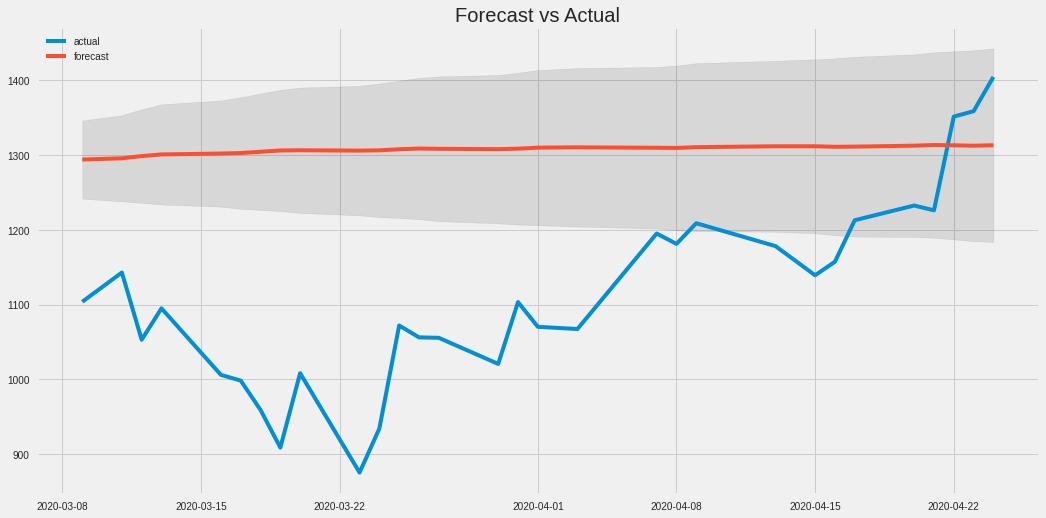

In [38]:
plt.figure(figsize=(16, 8))
plt.plot(test[ :step], label="actual")
plt.plot(fc, label="forecast")
plt.fill_between(lower.index, lower, upper, color="k", alpha=0.1)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")

Actual price is the blue line and the Forecasted price is the green line , Arima model contains a slope that is positive while the actual values has a slope that is negative , even if we add a constant that would be negative it would fit the data better but it's not optimal